In [1]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [2]:
import keras
from keras.layers import *
from keras.callbacks import ModelCheckpoint

from keras.datasets import mnist

(x_train, y_train), (x_val, y_val) = mnist.load_data()


Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2)
print(Y_train.shape,Y_test.shape)
print(X_train.shape,X_test.shape)

(48000,) (12000,)
(48000, 28, 28) (12000, 28, 28)


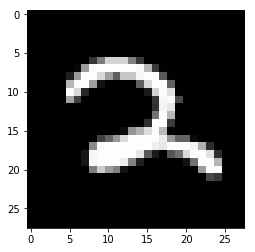

2


In [5]:
import matplotlib.pyplot as plt
idx = np.random.randint(len(X_train))
Im = X_train[idx]
plt.figure()
plt.imshow(Im,cmap='gray')
plt.show()
print(Y_train[idx])

In [6]:
from keras.models import Sequential
from keras.models import Model
# from keras.engine.input_layer import Input

alpha = 0.25
inp = (28,28,1)

# model = Sequential()
inp = Input(shape=inp)
L1 = Conv2D(int(64*alpha),(7,7))(inp)
L1 = BatchNormalization()(L1)
L1 = Activation('relu')(L1)

L2 = Conv2D(int(128*alpha),(3,3))(L1)
L2 = BatchNormalization()(L2)
L2 = Activation('relu')(L2)
L2 = MaxPooling2D((2,2))(L2)

L3 = Conv2D(int(128*alpha),(3,3))(L2)
L3 = BatchNormalization()(L3)
L3 = Activation('relu')(L3)

L4 = Conv2D(int(128*alpha),(1,1))(L3)
L4 = BatchNormalization()(L4)
L4 = Activation('relu')(L4)
L4 = ZeroPadding2D()(L4)

add1 = Add()([L2,L4])

L5 = Conv2D(int(256*alpha),(3,3))(add1)
L5 = BatchNormalization()(L5)
L5 = Activation('relu')(L5)
L5 = MaxPooling2D((2,2))(L5)

L6 = Conv2D(int(256*alpha),(3,3))(L5)
L6 = BatchNormalization()(L6)
L6 = Activation('relu')(L6)

L7 = Conv2D(int(256*alpha),(1,1))(L6)
L7 = BatchNormalization()(L7)
L7 = Activation('relu')(L7)
L7 = ZeroPadding2D()(L7)

add2 = Add()([L5,L7])

L8 = Conv2D(int(392*alpha),(3,3))(add2)
L8 = BatchNormalization()(L8)
L8 = Activation('relu')(L8)

L9 = GlobalMaxPooling2D()(L8)

output = Dense(10,activation='softmax')(L9)

model = Model(inp,output)

model.summary()








__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 22, 22, 16)   800         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 22, 22, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 22, 22, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
con

In [7]:
import numpy as np

Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)
y_val = keras.utils.to_categorical(y_val, 10)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    rescale=1/255.,
    shear_range=0.15,
    zoom_range=0.2)

val_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1/255.,
    shear_range=0.1,
    zoom_range=0.1)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(np.expand_dims(X_train,axis=-1))
val_gen.fit(np.expand_dims(X_test,axis=-1))

print(np.shape(np.expand_dims(X_train,axis=-1)))

(48000, 28, 28, 1)


In [9]:
import os
model.compile(keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint(os.path.join('/home/sivananda/MNIST/','stage_1_best.h5'),monitor='val_loss',save_weights_only=False,save_best_only=True)
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(np.expand_dims(X_train,axis=-1), Y_train, batch_size=64),
                    steps_per_epoch=(len(X_train) // 64)+1, 
                    epochs=50, 
                    validation_data=val_gen.flow(np.expand_dims(X_test,axis=-1),Y_test,batch_size=64),
                    validation_steps=(len(X_test)//64)+1,
                    callbacks=[checkpoint],
                    use_multiprocessing=True, workers=8)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50


/home/sivananda/.local/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


751/751 [==============================] - 65s 87ms/step - loss: 0.2475 - acc: 0.9365 - val_loss: 0.4792 - val_acc: 0.8595
Epoch 2/50
751/751 [==============================] - 64s 85ms/step - loss: 0.1360 - acc: 0.9642 - val_loss: 0.3277 - val_acc: 0.8983
Epoch 3/50
751/751 [==============================] - 66s 87ms/step - loss: 0.1215 - acc: 0.9677 - val_loss: 0.2731 - val_acc: 0.9129
Epoch 4/50
751/751 [==============================] - 66s 88ms/step - loss: 0.0852 - acc: 0.9772 - val_loss: 0.1861 - val_acc: 0.9480
Epoch 5/50
751/751 [==============================] - 66s 88ms/step - loss: 0.0805 - acc: 0.9796 - val_loss: 0.1039 - val_acc: 0.9683
Epoch 6/50
751/751 [==============================] - 67s 90ms/step - loss: 0.0856 - acc: 0.9783 - val_loss: 0.1909 - val_acc: 0.9366
Epoch 7/50
751/751 [==============================] - 72s 96ms/step - loss: 0.0783 - acc: 0.9788 - val_loss: 0.0985 - val_acc: 0.9673
Epoch 8/50
751/751 [==============================] - 71s 94ms/step - los

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


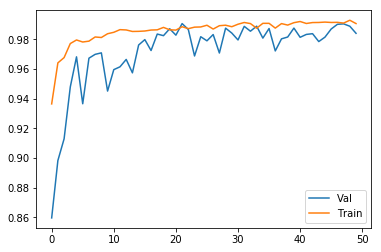

In [10]:
print(history.history.keys())
plt.plot(history.history['val_acc'],label="Val")
plt.plot(history.history['acc'],label="Train")
plt.legend()
plt.show()

In [11]:
# model.load_weights(os.path.join('/home/sivananda/MNIST/','stage_1_best.h5'))
checkpoint = ModelCheckpoint(os.path.join('/home/sivananda/MNIST/','stage_2_best.h5'),monitor='val_loss',save_weights_only=False,save_best_only=True)
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(np.expand_dims(X_train,axis=-1), Y_train, batch_size=256),
                    steps_per_epoch=(len(X_train) // 256)+1, 
                    epochs=15, 
                    validation_data=val_gen.flow(np.expand_dims(X_test,axis=-1),Y_test,batch_size=256),
                    validation_steps=(len(X_test)//256)+1,
                    callbacks=[checkpoint],
                    use_multiprocessing=True, workers=8)

Epoch 1/15
188/188 [==============================] - 68s 364ms/step - loss: 0.0480 - acc: 0.9867 - val_loss: 0.0468 - val_acc: 0.9909
Epoch 2/15
188/188 [==============================] - 62s 331ms/step - loss: 0.0398 - acc: 0.9885 - val_loss: 0.0392 - val_acc: 0.9928
Epoch 3/15
188/188 [==============================] - 66s 350ms/step - loss: 0.0374 - acc: 0.9898 - val_loss: 0.0302 - val_acc: 0.9902
Epoch 4/15
188/188 [==============================] - 70s 371ms/step - loss: 0.0230 - acc: 0.9929 - val_loss: 0.0283 - val_acc: 0.9927
Epoch 5/15
188/188 [==============================] - 65s 345ms/step - loss: 0.0244 - acc: 0.9935 - val_loss: 0.0285 - val_acc: 0.9905
Epoch 6/15
188/188 [==============================] - 63s 335ms/step - loss: 0.0378 - acc: 0.9905 - val_loss: 0.0520 - val_acc: 0.9846
Epoch 7/15
188/188 [==============================] - 67s 356ms/step - loss: 0.0367 - acc: 0.9915 - val_loss: 0.0701 - val_acc: 0.9816
Epoch 8/15
188/188 [==============================] - 6

In [12]:
model.compile(keras.optimizers.Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights(os.path.join('/home/sivananda/MNIST/','stage_2_best.h5'))
checkpoint = ModelCheckpoint(os.path.join('/home/sivananda/MNIST/','stage_3_best.h5'),monitor='val_loss',save_weights_only=False,save_best_only=True)
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(np.expand_dims(X_train,axis=-1), Y_train, batch_size=512),
                    steps_per_epoch=(len(X_train) // 512)+1, 
                    epochs=15, 
                    validation_data=val_gen.flow(np.expand_dims(X_test,axis=-1),Y_test,batch_size=512),
                    validation_steps=(len(X_test)//512)+1,
                    callbacks=[checkpoint],
                    use_multiprocessing=True, workers=8)

Epoch 1/15
94/94 [==============================] - 63s 673ms/step - loss: 0.0328 - acc: 0.9892 - val_loss: 0.0329 - val_acc: 0.9889
Epoch 2/15
94/94 [==============================] - 64s 679ms/step - loss: 0.0237 - acc: 0.9921 - val_loss: 0.0251 - val_acc: 0.9961
Epoch 3/15
94/94 [==============================] - 73s 780ms/step - loss: 0.0210 - acc: 0.9936 - val_loss: 0.0176 - val_acc: 0.9948
Epoch 4/15
94/94 [==============================] - 64s 679ms/step - loss: 0.0127 - acc: 0.9948 - val_loss: 0.0210 - val_acc: 0.9935
Epoch 5/15
94/94 [==============================] - 62s 659ms/step - loss: 0.0133 - acc: 0.9964 - val_loss: 0.0294 - val_acc: 0.9896
Epoch 6/15
94/94 [==============================] - 66s 707ms/step - loss: 0.0185 - acc: 0.9941 - val_loss: 0.0245 - val_acc: 0.9928
Epoch 7/15
94/94 [==============================] - 68s 721ms/step - loss: 0.0195 - acc: 0.9944 - val_loss: 0.0380 - val_acc: 0.9883
Epoch 8/15
94/94 [==============================] - 61s 646ms/step - 

In [13]:
model.compile(keras.optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights(os.path.join('/home/sivananda/MNIST/','stage_3_best.h5'))
checkpoint = ModelCheckpoint(os.path.join('/home/sivananda/MNIST/','stage_4_best.h5'),monitor='val_loss',save_weights_only=False,save_best_only=True)
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(np.expand_dims(X_train,axis=-1), Y_train, batch_size=1024),
                    steps_per_epoch=(len(X_train) // 1024)+1, 
                    epochs=15, 
                    validation_data=val_gen.flow(np.expand_dims(X_test,axis=-1),Y_test,batch_size=512),
                    validation_steps=(len(X_test)//512)+1,
                    callbacks=[checkpoint],
                    use_multiprocessing=True, workers=8)

Epoch 1/15
47/47 [==============================] - 67s 1s/step - loss: 0.0201 - acc: 0.9930 - val_loss: 0.0333 - val_acc: 0.9902
Epoch 2/15
47/47 [==============================] - 67s 1s/step - loss: 0.0153 - acc: 0.9956 - val_loss: 0.0233 - val_acc: 0.9967
Epoch 3/15
47/47 [==============================] - 73s 2s/step - loss: 0.0122 - acc: 0.9962 - val_loss: 0.0121 - val_acc: 0.9954
Epoch 4/15
47/47 [==============================] - 69s 1s/step - loss: 0.0089 - acc: 0.9973 - val_loss: 0.0175 - val_acc: 0.9935
Epoch 5/15
47/47 [==============================] - 76s 2s/step - loss: 0.0098 - acc: 0.9975 - val_loss: 0.0244 - val_acc: 0.9935
Epoch 6/15
47/47 [==============================] - 70s 1s/step - loss: 0.0122 - acc: 0.9961 - val_loss: 0.0210 - val_acc: 0.9941
Epoch 7/15
47/47 [==============================] - 65s 1s/step - loss: 0.0140 - acc: 0.9958 - val_loss: 0.0345 - val_acc: 0.9889
Epoch 8/15
47/47 [==============================] - 66s 1s/step - loss: 0.0072 - acc: 0.99

In [14]:
model.load_weights(os.path.join('/home/sivananda/MNIST/','stage_4_best.h5'))
model.save('/home/sivananda/MNIST/mnist_Res.h5')

In [15]:

res = model.evaluate(np.expand_dims(x_val,axis=-1)/255.,y_val)
res

10000/10000 [==============================] - 4s 362us/step


[0.014941846848172098, 0.9951]

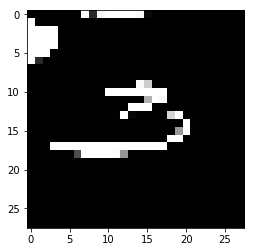

3


In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# model.load_weights('/home/sivananda/MNIST/stage_3_model.hdf5')
img = cv2.imread('/home/sivananda/Downloads/num3_dark.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_bit = cv2.bitwise_not(img)
_,img = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV)
# img = cv2.medianBlur(img,5)
# img = cv2.resize(img,(28,28),interpolation = cv2.LINEAR)
# img = cv2.bilateralFilter(img,9,75,75)
img = cv2.GaussianBlur(img,(5,5),0)
img = cv2.resize(img,(28,28))
inp = np.reshape(img, (1,28,28,1))/255.

plt.imshow(img,cmap='gray')
plt.show()
p1 = model.predict(inp)
# print(p)
print(np.argmax(p1))


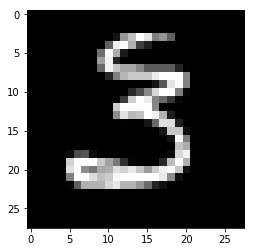

Pred:  3
Actual:  3


In [21]:
idx = np.random.randint(len(x_val))
img = x_val[idx]

plt.imshow(img,cmap='gray')
plt.show()

inp = np.reshape(img,(1,28,28,1))/255.
p1 = model.predict(inp)
# print(p)
print("Pred: ",np.argmax(p1))
print("Actual: ", np.argmax(y_val[idx]))


In [24]:
idx

5878